# Support Vector Regression (SVR)

## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

### Reshape y to 2D array

In [10]:
y = y.reshape(len(y), 1)

In [13]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [15]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [16]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training SVR on whole dataset
**kernels**: https://data-flair.training/blogs/svm-kernel-functions/

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## prediction on new data

In [20]:
scaler_y.inverse_transform(regressor.predict(scaler_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

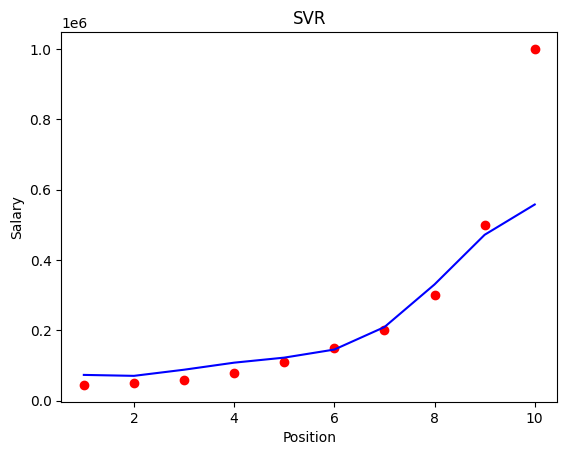

In [22]:
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color='red')
plt.plot(scaler_X.inverse_transform(X), scaler_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

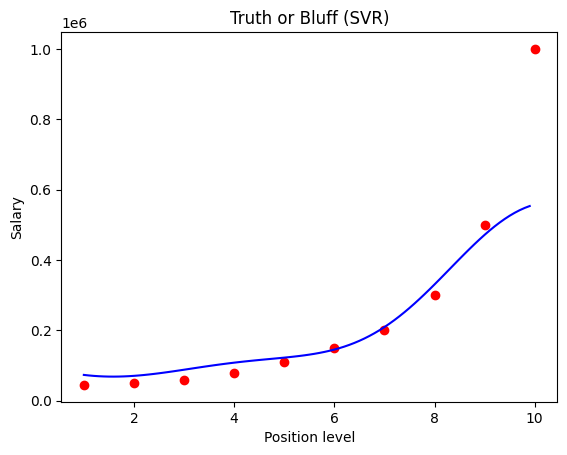

In [24]:
X_grid = np.arange(min(scaler_X.inverse_transform(X)), max(scaler_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, scaler_y.inverse_transform(regressor.predict(scaler_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [28]:
!pip install torchsvm

ERROR: Could not find a version that satisfies the requirement torchsvm (from versions: none)
ERROR: No matching distribution found for torchsvm


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load your dataset
# Assuming you have a dataset with features X and target variable y
# Replace 'your_dataset.csv' with the actual filename
data = pd.read_csv('Position_Salaries.csv')

# Separate features and target variable
X = data.drop(columns=['Position', 'Salary'])
y = data['Salary']

# Standardize the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

# Support Vector Regression model
class SVRModel(nn.Module):
    def __init__(self):
        super(SVRModel, self).__init__()
        self.linear = nn.Linear(X.shape[1], 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model and define the loss function and optimizer
model = SVRModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the SVR model
num_epochs = 200
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [20/200], Loss: 1.1714
Epoch [40/200], Loss: 1.0764
Epoch [60/200], Loss: 1.0340
Epoch [80/200], Loss: 1.0152
Epoch [100/200], Loss: 1.0068
Epoch [120/200], Loss: 1.0030
Epoch [140/200], Loss: 1.0013
Epoch [160/200], Loss: 1.0006
Epoch [180/200], Loss: 1.0003
Epoch [200/200], Loss: 1.0001


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
